<a href="https://colab.research.google.com/github/runyakeng/runyakeng/blob/main/EXsalak1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.02f}'.format

In [3]:
mdf = pd.read_excel("/content/drive/MyDrive/สลากอาชีพ.xlsx", header=0)
print(mdf)

       CIF_NUMBER  ...                                  OCC_NEW
0             283  ...  Officer / Worker of the Private Company
1            1087  ...  Officer / Worker of the Private Company
2            1281  ...  Officer / Worker of the Private Company
3            1561  ...  Officer / Worker of the Private Company
4            1882  ...  Officer / Worker of the Private Company
...           ...  ...                                      ...
17198    45520774  ...                           Business Owner
17199    45523992  ...                                 Labourer
17200    45564449  ...                           Business Owner
17201    45565044  ...                           Business Owner
17202    45573141  ...                           Business Owner

[17203 rows x 6 columns]


In [10]:
mdf2 = pd.get_dummies(mdf, columns = ['OCC_NEW','Mymo'])

print(mdf2)

       CIF_NUMBER    Saving  ...  Mymo_HAVE_MYMO  Mymo_NOT_HAVE_MYMO
0             283    330813  ...               1                   0
1            1087     34090  ...               0                   1
2            1281    192160  ...               0                   1
3            1561    629436  ...               1                   0
4            1882    255958  ...               1                   0
...           ...       ...  ...             ...                 ...
17198    45520774   5800700  ...               1                   0
17199    45523992   4521859  ...               1                   0
17200    45564449  10605596  ...               1                   0
17201    45565044       100  ...               1                   0
17202    45573141       100  ...               1                   0

[17203 rows x 16 columns]


In [11]:
mdf2.describe()
mdf2.corr()

,CIF_NUMBER,Saving,Income,Salak,OCC_NEW_Agriculturist,OCC_NEW_Business Owner,OCC_NEW_Freelance,OCC_NEW_Labourer,OCC_NEW_Not working / Unemployed,OCC_NEW_Officer / Worker of Financial Institution,OCC_NEW_Officer / Worker of the Private Company,OCC_NEW_Officer / Worker of the State Enterprises,OCC_NEW_Official / Worker of the Government,OCC_NEW_Professionally / Special Professional,Mymo_HAVE_MYMO,Mymo_NOT_HAVE_MYMO
CIF_NUMBER,1.00,0.01,0.06,0.00,0.12,0.21,0.01,0.01,0.00,-0.00,-0.13,-0.03,-0.05,-0.01,0.14,-0.14
Saving,0.01,1.00,0.02,-0.18,0.01,-0.01,0.00,0.01,-0.01,-0.00,0.01,-0.01,0.00,-0.01,0.00,-0.00
Income,0.06,0.02,1.00,0.08,0.00,0.01,0.00,0.00,-0.00,-0.01,-0.01,0.01,-0.01,0.01,0.02,-0.02
Salak,0.00,-0.18,0.08,1.00,0.01,-0.00,0.01,-0.01,0.01,-0.00,0.00,-0.00,-0.00,0.01,-0.00,0.00
OCC_NEW_Agriculturist,0.12,0.01,0.00,0.01,1.00,-0.03,-0.01,-0.01,-0.00,-0.01,-0.07,-0.01,-0.03,-0.01,0.02,-0.02
OCC_NEW_Business Owner,0.21,-0.01,0.01,-0.00,-0.03,1.00,-0.07,-0.09,-0.02,-0.06,-0.51,-0.09,-0.20,-0.04,0.02,-0.02
OCC_NEW_Freelance,0.01,0.00,0.00,0.01,-0.01,-0.07,1.00,-0.03,-0.01,-0.02,-0.15,-0.03,-0.06,-0.01,-0.00,0.00
OCC_NEW_Labourer,0.01,0.01,0.00,-0.01,-0.01,-0.09,-0.03,1.00,-0.01,-0.02,-0.21,-0.04,-0.09,-0.02,0.00,-0.00
OCC_NEW_Not working / Unemployed,0.00,-0.01,-0.00,0.01,-0.00,-0.02,-0.01,-0.01,1.00,-0.01,-0.06,-0.01,-0.02,-0.00,0.00,-0.00
OCC_NEW_Officer / Worker of Financial Institution,-0.00,-0.00,-0.01,-0.00,-0.01,-0.06,-0.02,-0.02,-0.01,1.00,-0.13,-0.02,-0.05,-0.01,0.01,-0.01


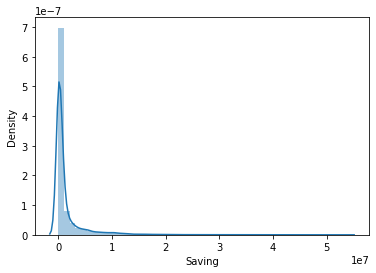

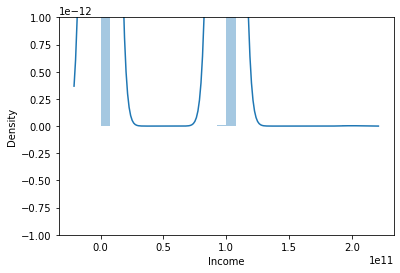

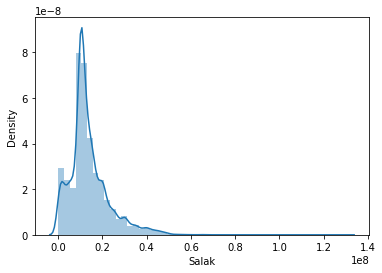

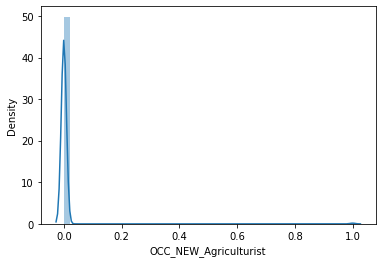

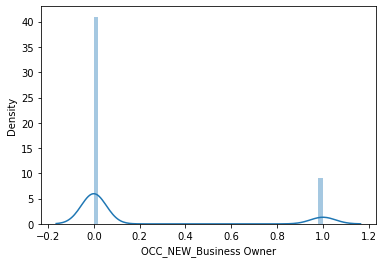

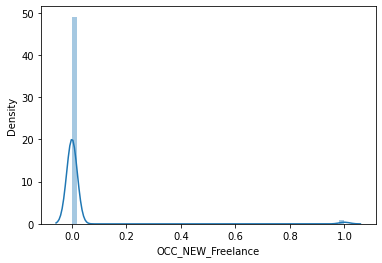

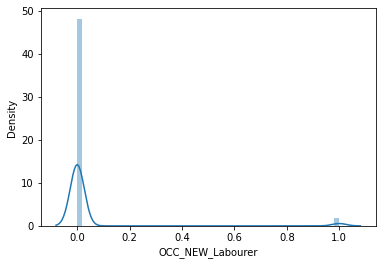

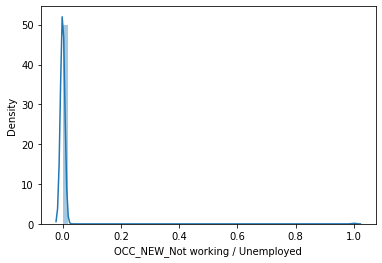

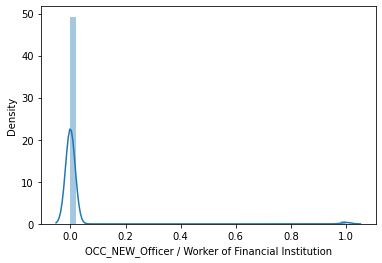

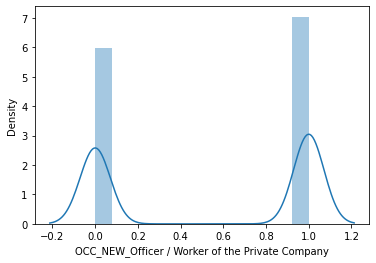

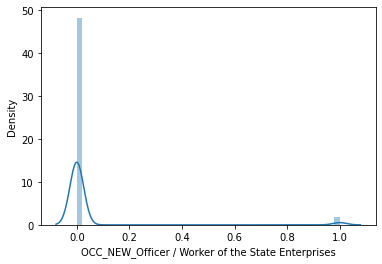

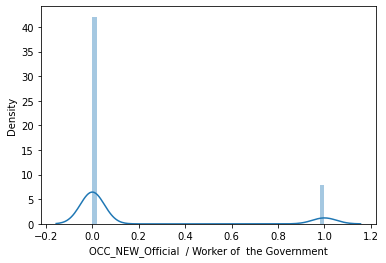

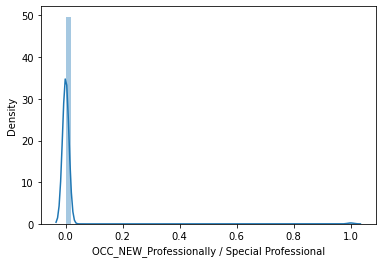

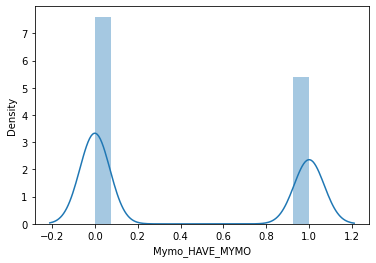

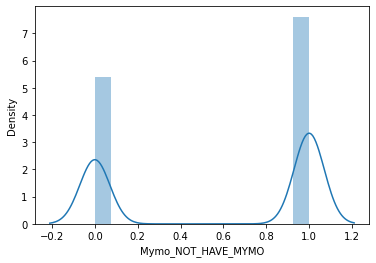

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


for i, col in enumerate(mdf2.columns[1:]):
    plt.figure(i)
    sns.distplot(mdf2[col])
    
plt.show()

In [14]:
# https://plotly.com/python/histograms/
import plotly.express as px
fig = px.histogram(mdf2, x="Income")
fig.show()

In [15]:
import plotly.express as px
fig = px.histogram(mdf2, x="Salak")
fig.show()

In [16]:
from sklearn.preprocessing import StandardScaler #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

mdf2_std = pd.DataFrame(StandardScaler().fit_transform(mdf2[mdf2.columns[1:]]))
mdf2_std.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.33,-0.85,-0.76,-0.06,-0.47,-0.14,-0.20,-0.05,-0.12,0.92,-0.19,-0.43,-0.08,1.19,-1.19
1,-0.41,1.18,-0.28,-0.06,-0.47,-0.14,-0.20,-0.05,-0.12,0.92,-0.19,-0.43,-0.08,-0.84,0.84
2,-0.37,-0.85,-0.03,-0.06,-0.47,-0.14,-0.20,-0.05,-0.12,0.92,-0.19,-0.43,-0.08,-0.84,0.84
3,-0.25,-0.85,-0.70,-0.06,-0.47,-0.14,-0.20,-0.05,-0.12,0.92,-0.19,-0.43,-0.08,1.19,-1.19
4,-0.35,-0.85,1.92,-0.06,-0.47,-0.14,-0.20,-0.05,-0.12,0.92,-0.19,-0.43,-0.08,1.19,-1.19


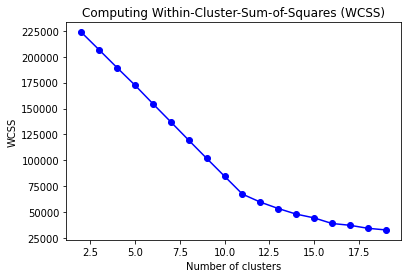

In [17]:
from sklearn.cluster import KMeans
# Use the Elbow method to find a good number of clusters using Within-Cluster-Sum-of-Squares (WCSS)
wcss = []
N = range(2, 20)
for i in N:
    model = KMeans(n_clusters=i) 
    model.fit_predict(mdf2_std)
    wcss.append(model.inertia_)
    
plt.plot(N, wcss, 'bo-')
plt.title("Computing Within-Cluster-Sum-of-Squares (WCSS)")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.22355772364674237
For n_clusters = 3 The average silhouette_score is : 0.24881710434217924
For n_clusters = 4 The average silhouette_score is : 0.25362238727995906
For n_clusters = 5 The average silhouette_score is : 0.34533010171170536
For n_clusters = 6 The average silhouette_score is : 0.3762131170627702
For n_clusters = 7 The average silhouette_score is : 0.39069894494249935
For n_clusters = 8 The average silhouette_score is : 0.39809992656590343
For n_clusters = 9 The average silhouette_score is : 0.4124277562195317
For n_clusters = 10 The average silhouette_score is : 0.42052619872553193
For n_clusters = 11 The average silhouette_score is : 0.42433221487270073
For n_clusters = 12 The average silhouette_score is : 0.4339688034476956
For n_clusters = 13 The average silhouette_score is : 0.47507353995911883
For n_clusters = 14 The average silhouette_score is : 0.48729532355056476
For n_clusters = 15 The average silhouette_score 

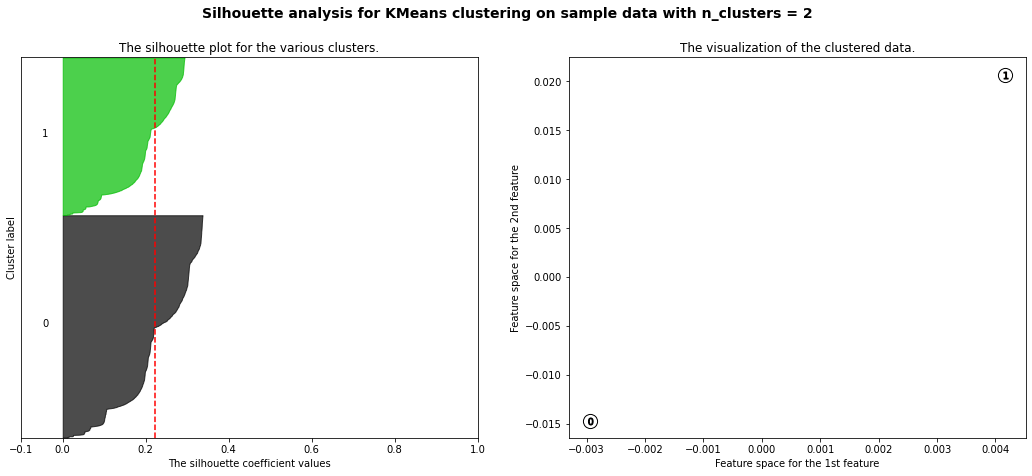

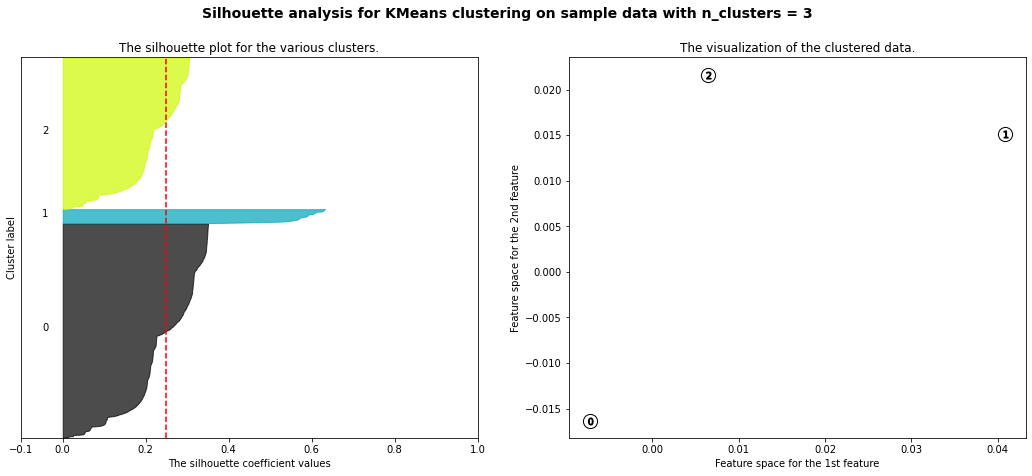

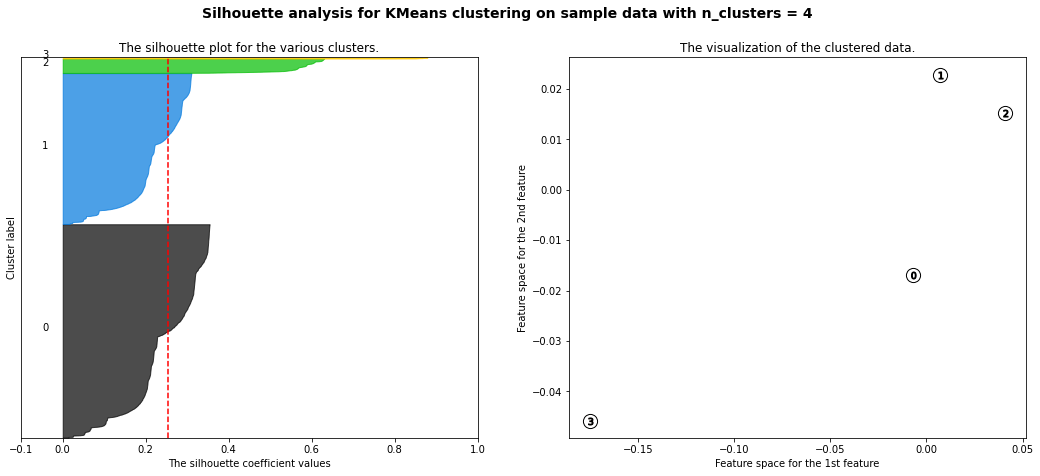

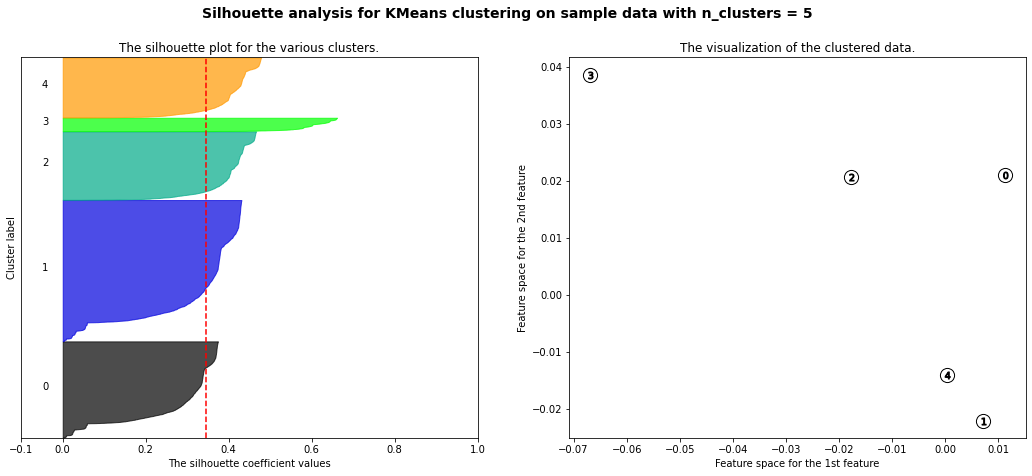

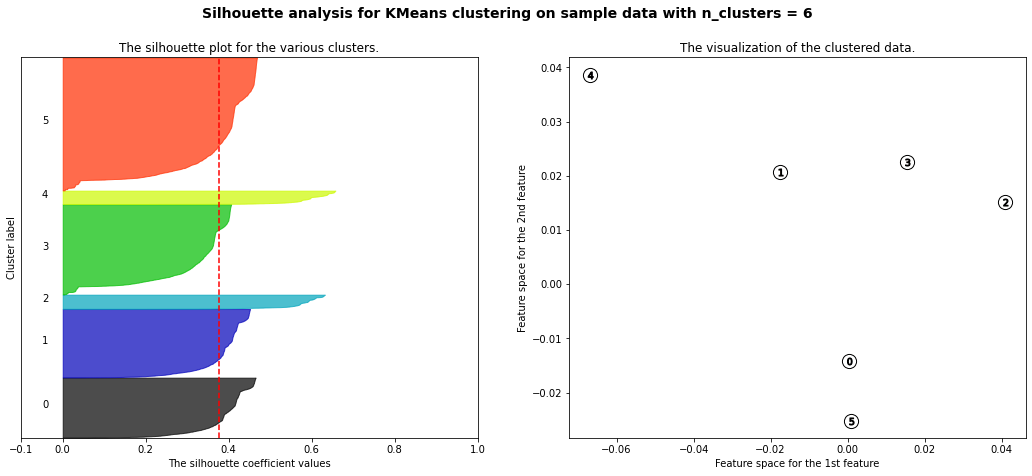

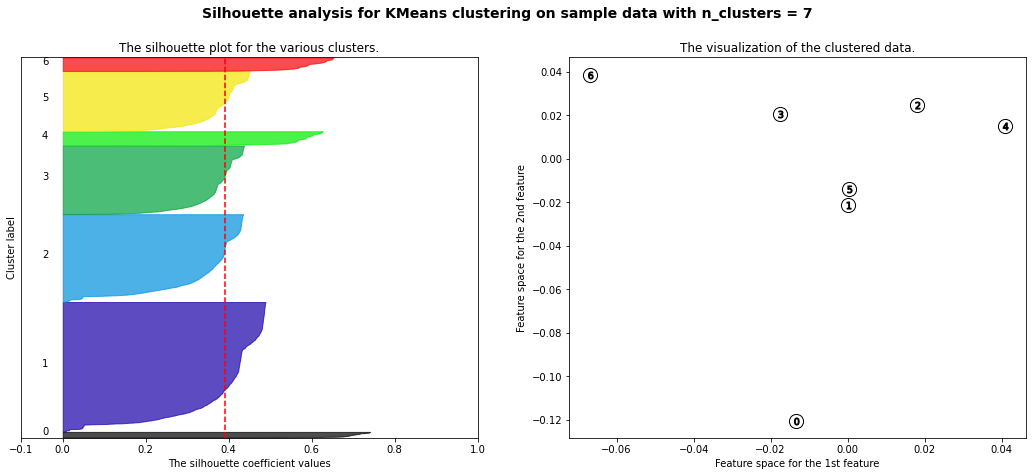

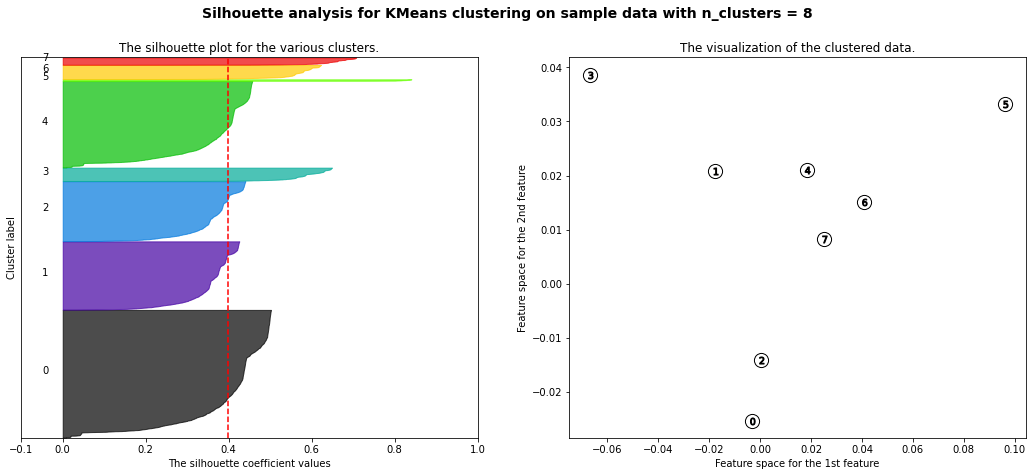

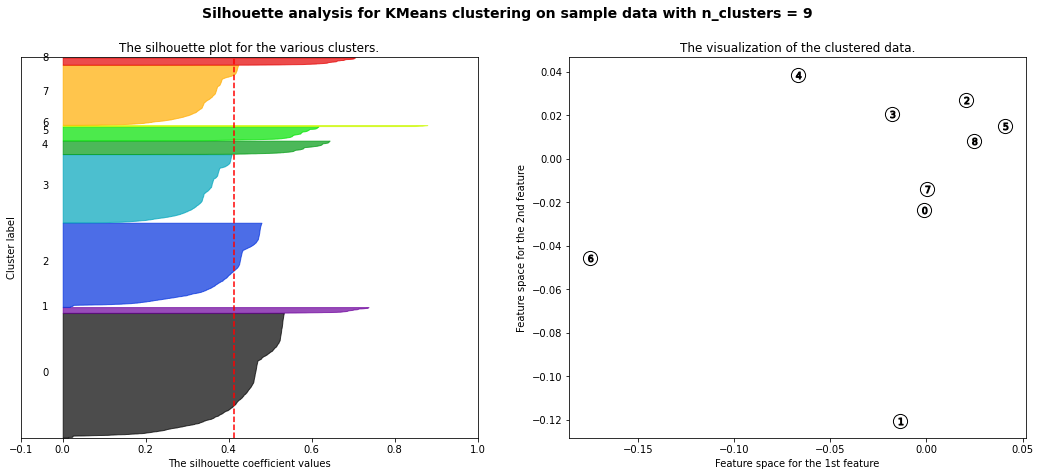

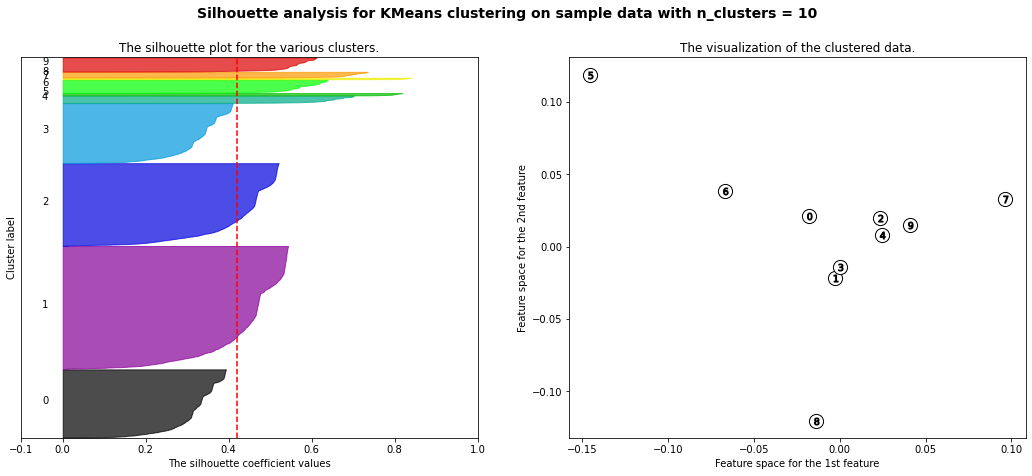

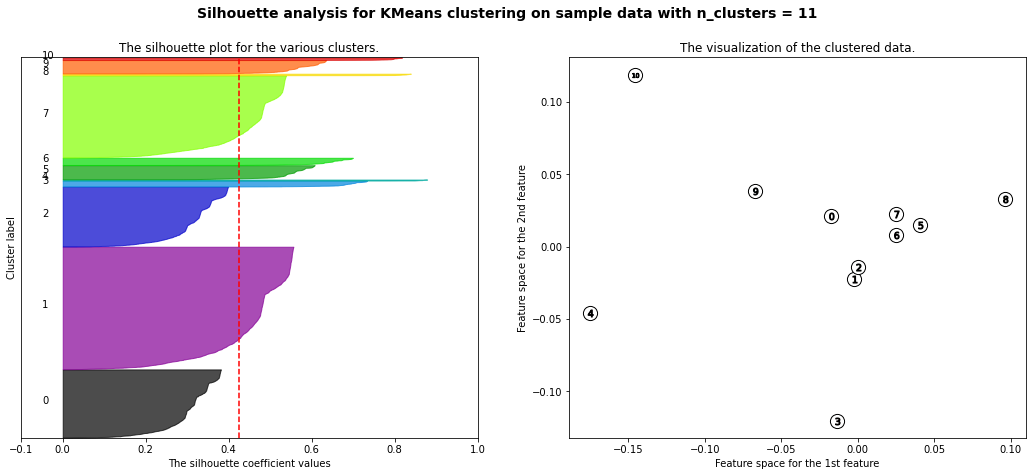

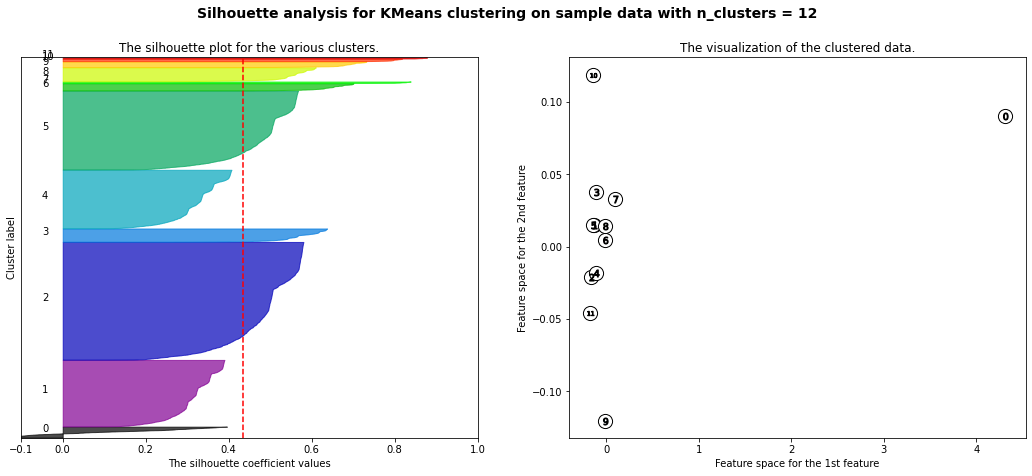

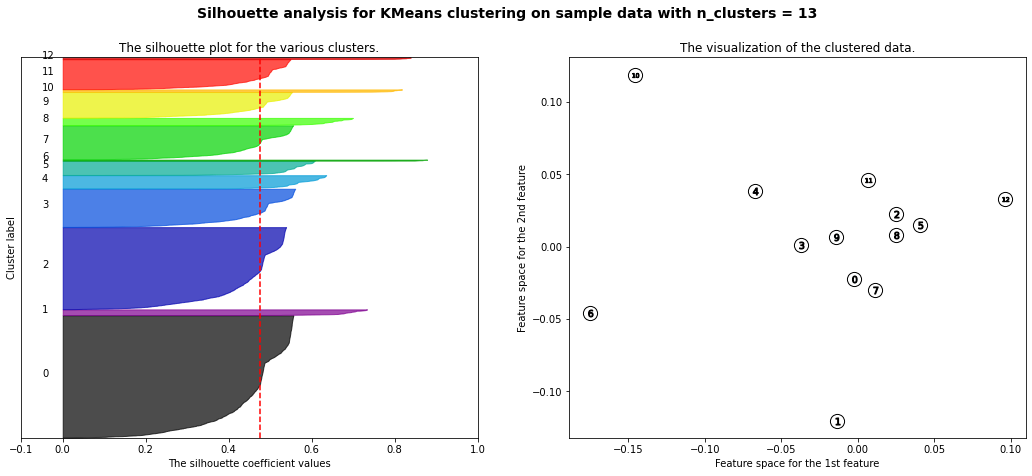

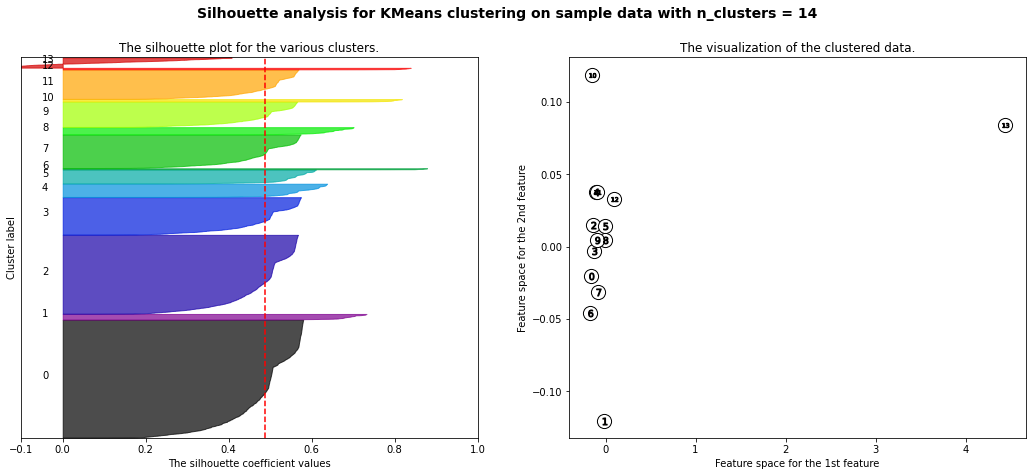

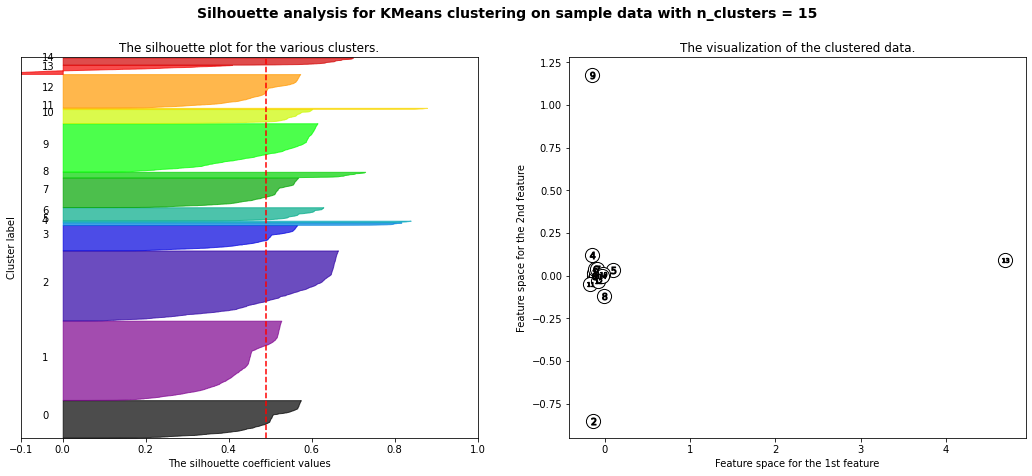

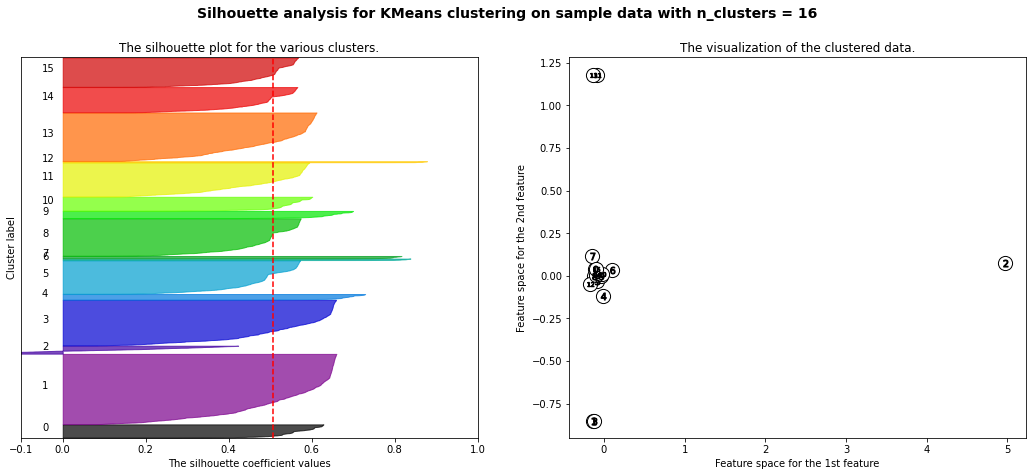

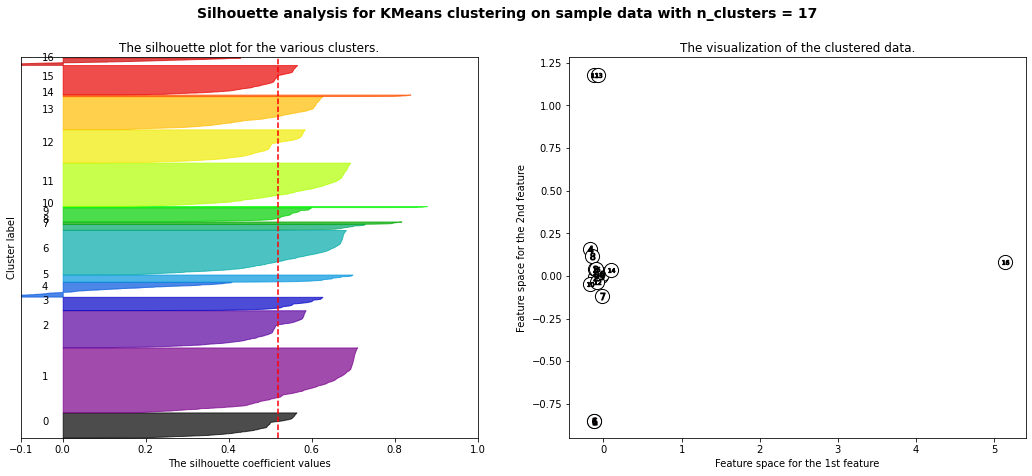

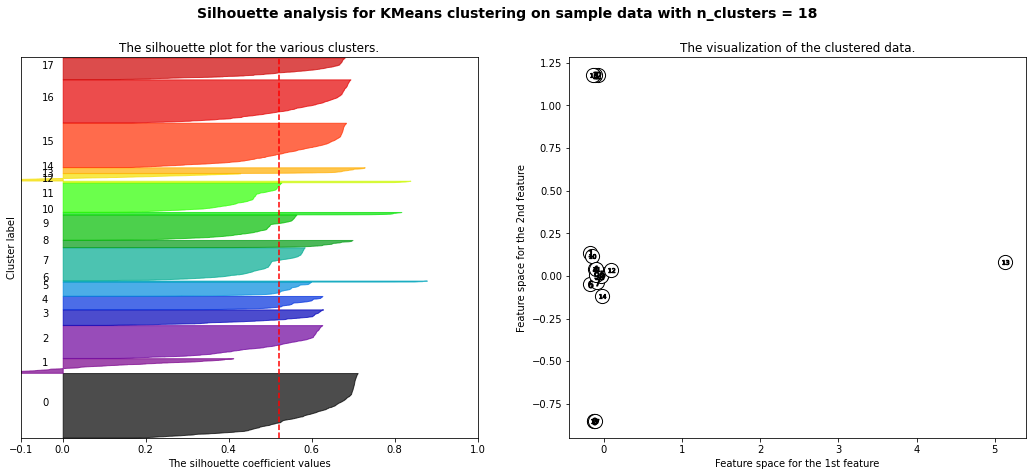

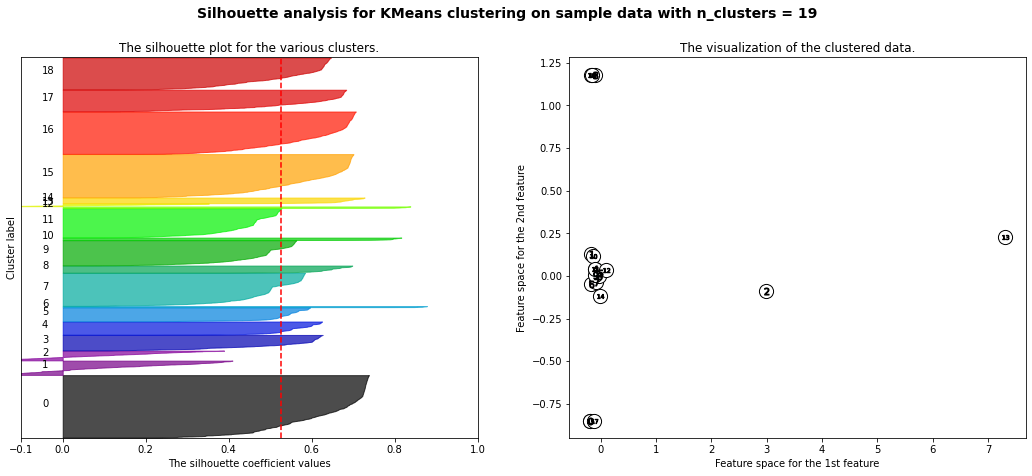

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

ss = []

for n_clusters in N:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(mdf2_std) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(mdf2_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(mdf2_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(mdf2_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [39]:
cluster = KMeans(n_clusters=19)
mdf['cluster'] = cluster.fit_predict(mdf2_std)
print(mdf)

       CIF_NUMBER    Saving  ...                                  OCC_NEW  cluster
0             283    330813  ...  Officer / Worker of the Private Company        1
1            1087     34090  ...  Officer / Worker of the Private Company       10
2            1281    192160  ...  Officer / Worker of the Private Company        0
3            1561    629436  ...  Officer / Worker of the Private Company        1
4            1882    255958  ...  Officer / Worker of the Private Company        1
...           ...       ...  ...                                      ...      ...
17198    45520774   5800700  ...                           Business Owner       18
17199    45523992   4521859  ...                                 Labourer       11
17200    45564449  10605596  ...                           Business Owner       18
17201    45565044       100  ...                           Business Owner       12
17202    45573141       100  ...                           Business Owner       18

[17

In [40]:
mdfCluster = mdf.groupby('cluster', as_index=False).mean()
print(mdf2Cluster)
mdfCluster['NUM_CUST'] = mdf[['cluster','CIF_NUMBER']].groupby('cluster').count()

mdfCluster

    cluster  CIF_NUMBER  ...  Mymo_NOT_HAVE_MYMO  NUM_CUST
0         0 12372578.15  ...                1.00      2949
1         1 15236202.45  ...                0.00      1499
2         2 22771700.53  ...                0.00      1338
3         3 15638189.21  ...                0.56        48
4         4 14867799.85  ...                0.55       259
5         5 15399273.35  ...                0.00      1150
6         6 14039338.25  ...                0.54       109
7         7 15536794.52  ...                0.57       636
8         8 13101951.54  ...                0.62       604
9         9 15534867.18  ...                0.60       327
10       10 35981044.00  ...                0.45        69
11       11 19305341.93  ...                1.00       710
12       12 13400915.93  ...                1.00      1974
13       13 11942852.20  ...                1.00       910
14       14 15980252.26  ...                0.59       333
15       15 14706177.19  ...                0.00      20

,cluster,CIF_NUMBER,Saving,Income,Salak,NUM_CUST
0,0,12372866.79,1111246.48,20050.23,11562058.78,2952
1,1,14708370.22,1091695.71,21174.07,12418929.72,2027
2,2,14867799.85,1484147.47,35907348185.33,13684224.32,259
3,3,12563825.92,1237192.20,39960251319.95,13369985.76,1509
4,4,13101951.54,1129695.25,43708620880.47,13712535.33,604
5,5,19313374.46,1148606.62,100000000000.00,14523026.98,709
6,6,14039338.25,999956.09,47706433853.21,15199480.73,109
7,7,15638189.21,890992.02,39583344583.33,15196841.67,48
8,8,15534867.18,1409738.98,41896035648.14,14217470.03,327
9,9,35981044.00,1886715.96,43478270434.78,14639302.17,69


<Figure size 432x288 with 0 Axes>

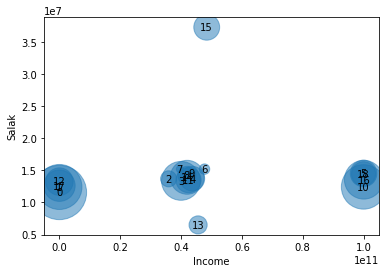

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
fig, ax = plt.subplots()
ax.scatter(mdfCluster['Income'], mdfCluster['Salak'], s=mdfCluster['NUM_CUST'], alpha = 0.5)
ax.set_xlabel("Income")
ax.set_ylabel("Salak")

for i, txt in enumerate(mdfCluster['cluster']):
    ax.annotate(txt, 
                (mdfCluster['Income'][i], 
                mdfCluster["Salak"][i]), 
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

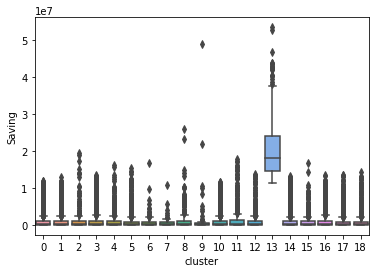

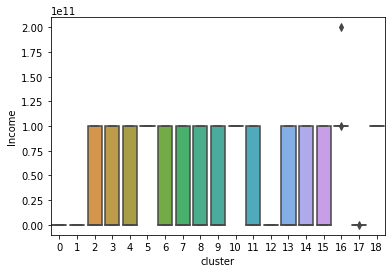

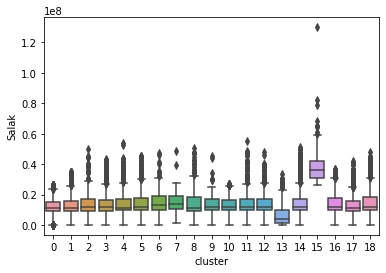

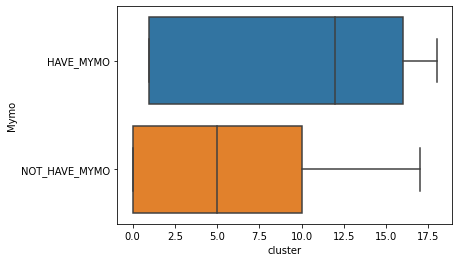

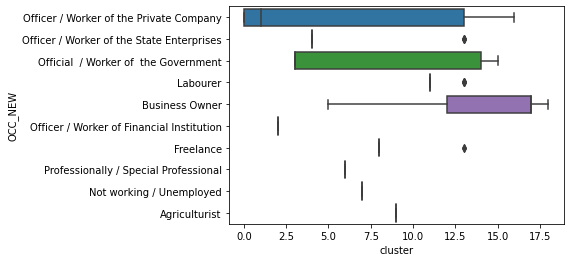

In [42]:
for i, col in enumerate(mdf.columns[1:-1]):
    sns.boxplot(x="cluster", y =col, data=mdf)
    plt.show()

Text(0.5, 1.0, 'CORRELATION BETWEEN VARIABLES')

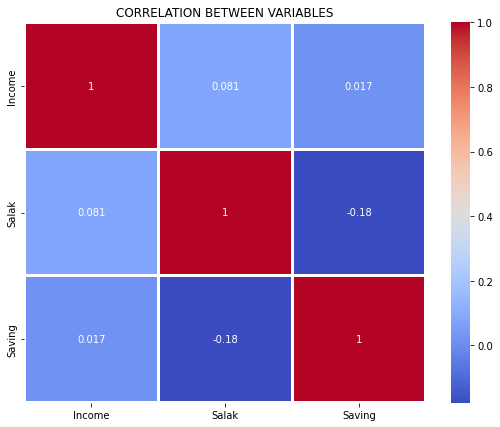

In [38]:
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
correlation = mdf2[["Income",'Salak','Saving']].corr()
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True,cmap="coolwarm",linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")

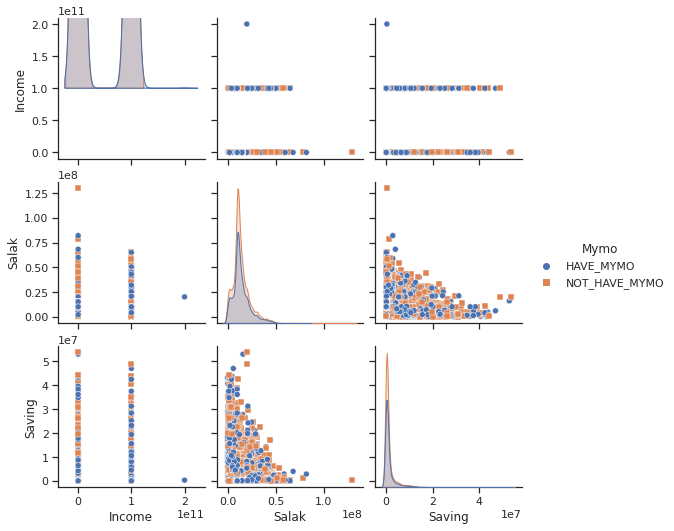

In [44]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(mdf, vars=["Income", 'Salak', 'Saving'],hue="Mymo", markers=["o", "s"])

In [ ]:
plt.scatter(mdf['Income'],mdf['Salak'], cmap="coolwarm", c=mdf['Saving'])
plt.ylabel("Income")
plt.xlabel("Salak")
plt.title("Saing")
plt.show()

mdf_have = mdf[mdf["Mymo"]=="HAVE MYMO"]
plt.scatter(mdf_have['Age'],mdf_female['Annual Income (k$)'], cmap="coolwarm", c=mdf_female['Spending Score (1-100)'])
plt.ylabel("Annual Income (k$)")
plt.xlabel("Age")
plt.title("Female Spending Score (1-100)")
plt.show()

mdf_male = mdf[mdf["Gender"]=="Male"]
plt.scatter(mdf_male['Age'],mdf_male['Annual Income (k$)'], cmap="coolwarm", c=mdf_male['Spending Score (1-100)'])
plt.ylabel("Annual Income (k$)")
plt.xlabel("Age")
plt.title("Male Spending Score (1-100)")
plt.show()